In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sedsData = pd.read_csv('seds.csv')
concentrationData = pd.read_csv('air_concentrations.csv')

In [4]:
print(concentrationData[:2])

stateCodes = concentrationData.state_code.unique()

concentrationData.date_off = pd.to_datetime(concentrationData['date_off'], format='%m/%d/%Y %H:%M:%S').dt.year



    latitude  longitude state_code    county              date_on  \
0  39.988309 -79.251573         PA  Somerset  01/03/2000 16:37:00   
1  39.988309 -79.251573         PA  Somerset  01/10/2000 16:09:00   

              date_off    TSO4    TNH4      CA      MG     NA       K  CL  \
0  01/10/2000 16:03:00  2.3406  0.7764  0.1267  0.0144  0.174  0.0536 NaN   
1  01/17/2000 19:57:00  1.7681  0.9436  0.2127  0.0272  0.170  0.0452 NaN   

     NSO4   NHNO3     WSO2    WNO3  total_SO2  total_NO3  flow_volume  
0  0.4753  1.1347  10.2084  0.5588    10.5254     1.8930      14.9233  
1  1.2391  1.3881  16.4770  0.4621    17.3035     2.3097      14.9819  


In [5]:
groupData = concentrationData.groupby(['state_code','date_off'])[['TSO4', 'TNH4', 'CA', 'MG','NA','K', 'CL','NSO4','NHNO3','WSO2','total_SO2','total_NO3']].mean()
print(groupData.loc[('AK')])

              TSO4      TNH4        CA        MG        NA         K  \
date_off                                                               
2000      0.311509  0.074342  0.021300  0.010716  0.049992  0.038151   
2001      0.344557  0.064841  0.033223  0.009694  0.045306  0.011906   
2002      0.351677  0.074067  0.030630  0.009144  0.032071  0.017988   
2003      0.347709  0.057335  0.026134  0.009852  0.033552  0.013156   
2004      0.354991  0.133067  0.056972  0.014589  0.039881  0.036108   
2005      0.347662  0.082552  0.022312  0.009221  0.032775  0.020744   
2006      0.480700  0.059022  0.023551  0.011545  0.042616  0.014633   
2007      0.379390  0.062362  0.021106  0.009446  0.032017  0.013319   
2008      0.429562  0.070011  0.022670  0.012051  0.050336  0.015294   
2009      0.593106  0.066690  0.030452  0.013133  0.056313  0.024319   
2010      0.309473  0.064600  0.028096  0.011659  0.040443  0.023233   
2011      0.371162  0.054846  0.022337  0.010044  0.043512  0.01

In [398]:
groupMeanData = groupData[['TSO4', 'TNH4', 'CA', 'MG','NA','K', 'CL','NSO4','NHNO3','WSO2','total_SO2','total_NO3']].mean()
print(groupData)

                         TSO4      TNH4        CA        MG        NA  \
state_code date_off                                                     
AK         2000      0.311509  0.074342  0.021300  0.010716  0.049992   
           2001      0.344557  0.064841  0.033223  0.009694  0.045306   
           2002      0.351677  0.074067  0.030630  0.009144  0.032071   
           2003      0.347709  0.057335  0.026134  0.009852  0.033552   
           2004      0.354991  0.133067  0.056972  0.014589  0.039881   
           2005      0.347662  0.082552  0.022312  0.009221  0.032775   
           2006      0.480700  0.059022  0.023551  0.011545  0.042616   
           2007      0.379390  0.062362  0.021106  0.009446  0.032017   
           2008      0.429562  0.070011  0.022670  0.012051  0.050336   
           2009      0.593106  0.066690  0.030452  0.013133  0.056313   
           2010      0.309473  0.064600  0.028096  0.011659  0.040443   
           2011      0.371162  0.054846  0.022337  

In [6]:
sedsTXB = sedsData[sedsData["msn"].str.endswith("TXB")]
sedsTXB = sedsTXB[sedsTXB.year >= 2000]
print(sedsTXB[sedsTXB.year >= 2000])


         year    msn state_name state_code  \
580      2000  ARTXB     Alaska         AK   
581      2001  ARTXB     Alaska         AK   
582      2002  ARTXB     Alaska         AK   
583      2003  ARTXB     Alaska         AK   
584      2004  ARTXB     Alaska         AK   
585      2005  ARTXB     Alaska         AK   
586      2006  ARTXB     Alaska         AK   
587      2007  ARTXB     Alaska         AK   
588      2008  ARTXB     Alaska         AK   
589      2009  ARTXB     Alaska         AK   
590      2010  ARTXB     Alaska         AK   
591      2011  ARTXB     Alaska         AK   
592      2012  ARTXB     Alaska         AK   
593      2013  ARTXB     Alaska         AK   
594      2014  ARTXB     Alaska         AK   
595      2015  ARTXB     Alaska         AK   
596      2016  ARTXB     Alaska         AK   
597      2017  ARTXB     Alaska         AK   
1216     2000  AVTXB     Alaska         AK   
1217     2001  AVTXB     Alaska         AK   
1218     2002  AVTXB     Alaska   

Index(['TSO4', 'TNH4', 'CA', 'MG', 'NA', 'K', 'CL', 'NSO4', 'NHNO3', 'WSO2',
       'total_SO2', 'total_NO3'],
      dtype='object')


C:\Python35\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


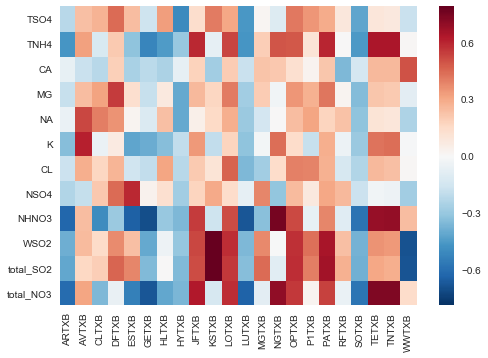

In [406]:
#print(groupMeanData)
concentrationAK = groupData.loc[('AK')]
sedsTXB_1 = sedsTXB[sedsTXB.year >= 2000]

sedsTXB_AK = sedsTXB_1[sedsTXB_1.state_code=='AK']

#print(concentrationAK)
#print(sedsTXB_AK)
#print(groupData.loc[('AK')])
dates = pd.Series([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], dtype='int')

concentrationAK['year'] = dates.values
concentrationAK_Final = concentrationAK[concentrationAK.year < 2018]

msns = sedsTXB_AK.msn.unique()
#print(concentrationAK)
columns = concentrationAK_Final.columns
columns = columns[:-1]
concentrationAK_Final = concentrationAK_Final[columns]

print(columns)

correlationMap = pd.DataFrame()

for msn in msns:
    df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
    df.columns = ['year',msn]
    if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
        concentrationAK_Final[msn] = df[msn].values
        #print(correlationMap)
        correlationMap[msn] = concentrationAK_Final[:-1].corrwith(concentrationAK_Final[msn])[:-1]
        #print(correlationMap)
        #print(concentrationAK_Final.corr())
        concentrationAK_Final = concentrationAK_Final[columns]
        #plt.show()
    
sns.heatmap(correlationMap)
plt.show()
#print(concentrationAK_Final)

#print(concentrationAK_Final.corr())
#covmap = sns.heatmap(concentrationAK_Final.cov())
#print(sedsTXB.value[(sedsTXB.year >= 2000, sedsTXB.state_code=='AK')])
#sourceAK = sedsTXB.loc[('AK')]

#print(groupMeanData[groupMeanData.state_code == 'AK'])

C:\Python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


              ARTXB
TSO4      -3.595831
TNH4      -0.942509
CA         0.028629
MG        -0.048385
NA         0.005728
K         -0.190151
CL        -0.134851
NSO4      -1.749830
NHNO3     -1.554745
WSO2      -5.297062
total_SO2 -6.464118
total_NO3 -2.472249
              ARTXB     AVTXB
TSO4      -3.595831  2.768887
TNH4      -0.942509  0.536959
CA         0.028629 -0.035378
MG        -0.048385  0.048522
NA         0.005728  0.341467
K         -0.190151  0.243264
CL        -0.134851  0.193058
NSO4      -1.749830  0.153040
NHNO3     -1.554745  0.521727
WSO2      -5.297062  1.765868
total_SO2 -6.464118  1.867744
total_NO3 -2.472249  1.050337
              ARTXB     AVTXB     CLTXB
TSO4      -3.595831  2.768887  0.236714
TNH4      -0.942509  0.536959 -0.020361
CA         0.028629 -0.035378 -0.016502
MG        -0.048385  0.048522  0.005515
NA         0.005728  0.341467  0.034413
K         -0.190151  0.243264 -0.002168
CL        -0.134851  0.193058  0.013658
NSO4      -1.749830  0.153040 

C:\Python35\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


              ARTXB     AVTXB     CLTXB     DFTXB     ESTXB     GETXB  \
TSO4      -3.595831  2.768887  0.236714  0.452826  0.107743 -0.439563   
TNH4      -0.942509  0.536959 -0.020361  0.047534 -0.039280 -0.382969   
CA         0.028629 -0.035378 -0.016502  0.017749 -0.013004 -0.064062   
MG        -0.048385  0.048522  0.005515  0.011363  0.001217 -0.009782   
NA         0.005728  0.341467  0.034413  0.036269  0.001834 -0.029505   
K         -0.190151  0.243264 -0.002168  0.006333 -0.020371 -0.112679   
CL        -0.134851  0.193058  0.013658  0.022275 -0.004583 -0.058743   
NSO4      -1.749830  0.153040  0.070145  0.181535  0.109569  0.086616   
NHNO3     -1.554745  0.521727 -0.099719 -0.078776 -0.086611 -0.575315   
WSO2      -5.297062  1.765868  0.108064  0.310329  0.083190 -0.975258   
total_SO2 -6.464118  1.867744  0.154845  0.431403  0.156271 -0.917434   
total_NO3 -2.472249  1.050337 -0.118485 -0.029971 -0.124510 -0.949067   

              HLTXB  HYTXB  
TSO4       0.466309  

              ARTXB     AVTXB     CLTXB     DFTXB     ESTXB     GETXB  \
TSO4      -3.595831  2.768887  0.236714  0.452826  0.107743 -0.439563   
TNH4      -0.942509  0.536959 -0.020361  0.047534 -0.039280 -0.382969   
CA         0.028629 -0.035378 -0.016502  0.017749 -0.013004 -0.064062   
MG        -0.048385  0.048522  0.005515  0.011363  0.001217 -0.009782   
NA         0.005728  0.341467  0.034413  0.036269  0.001834 -0.029505   
K         -0.190151  0.243264 -0.002168  0.006333 -0.020371 -0.112679   
CL        -0.134851  0.193058  0.013658  0.022275 -0.004583 -0.058743   
NSO4      -1.749830  0.153040  0.070145  0.181535  0.109569  0.086616   
NHNO3     -1.554745  0.521727 -0.099719 -0.078776 -0.086611 -0.575315   
WSO2      -5.297062  1.765868  0.108064  0.310329  0.083190 -0.975258   
total_SO2 -6.464118  1.867744  0.154845  0.431403  0.156271 -0.917434   
total_NO3 -2.472249  1.050337 -0.118485 -0.029971 -0.124510 -0.949067   

              HLTXB  HYTXB     JFTXB     KSTXB    

              ARTXB     AVTXB     CLTXB     DFTXB     ESTXB     GETXB  \
TSO4      -3.595831  2.768887  0.236714  0.452826  0.107743 -0.439563   
TNH4      -0.942509  0.536959 -0.020361  0.047534 -0.039280 -0.382969   
CA         0.028629 -0.035378 -0.016502  0.017749 -0.013004 -0.064062   
MG        -0.048385  0.048522  0.005515  0.011363  0.001217 -0.009782   
NA         0.005728  0.341467  0.034413  0.036269  0.001834 -0.029505   
K         -0.190151  0.243264 -0.002168  0.006333 -0.020371 -0.112679   
CL        -0.134851  0.193058  0.013658  0.022275 -0.004583 -0.058743   
NSO4      -1.749830  0.153040  0.070145  0.181535  0.109569  0.086616   
NHNO3     -1.554745  0.521727 -0.099719 -0.078776 -0.086611 -0.575315   
WSO2      -5.297062  1.765868  0.108064  0.310329  0.083190 -0.975258   
total_SO2 -6.464118  1.867744  0.154845  0.431403  0.156271 -0.917434   
total_NO3 -2.472249  1.050337 -0.118485 -0.029971 -0.124510 -0.949067   

              HLTXB  HYTXB     JFTXB     KSTXB    

              ARTXB     AVTXB     CLTXB     DFTXB     ESTXB     GETXB  \
TSO4      -3.595831  2.768887  0.236714  0.452826  0.107743 -0.439563   
TNH4      -0.942509  0.536959 -0.020361  0.047534 -0.039280 -0.382969   
CA         0.028629 -0.035378 -0.016502  0.017749 -0.013004 -0.064062   
MG        -0.048385  0.048522  0.005515  0.011363  0.001217 -0.009782   
NA         0.005728  0.341467  0.034413  0.036269  0.001834 -0.029505   
K         -0.190151  0.243264 -0.002168  0.006333 -0.020371 -0.112679   
CL        -0.134851  0.193058  0.013658  0.022275 -0.004583 -0.058743   
NSO4      -1.749830  0.153040  0.070145  0.181535  0.109569  0.086616   
NHNO3     -1.554745  0.521727 -0.099719 -0.078776 -0.086611 -0.575315   
WSO2      -5.297062  1.765868  0.108064  0.310329  0.083190 -0.975258   
total_SO2 -6.464118  1.867744  0.154845  0.431403  0.156271 -0.917434   
total_NO3 -2.472249  1.050337 -0.118485 -0.029971 -0.124510 -0.949067   

              HLTXB  HYTXB     JFTXB     KSTXB    

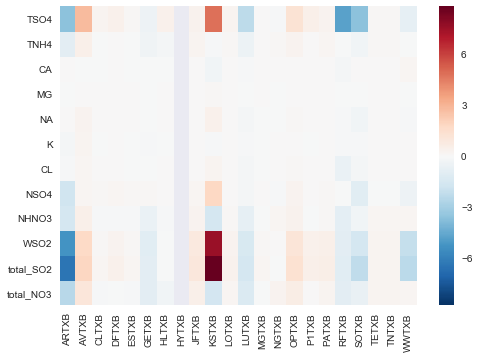

In [407]:
columns = concentrationAK_Final.columns
concentrationAK_Final = concentrationAK_Final[columns]

covarianceMap = pd.DataFrame()

#log
for msn in msns:
    df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
    df.columns = ['year',msn]
    if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
        concentrationAK_Final[msn] = np.log(df[msn].values)
        covarianceMap[msn] = 100*concentrationAK_Final.cov()[msn][:-1]
        #print(covarianceMap)
        #print(concentrationAK_Final.corr())
        concentrationAK_Final = concentrationAK_Final[columns]
        
sns.heatmap(covarianceMap)
plt.show()

C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


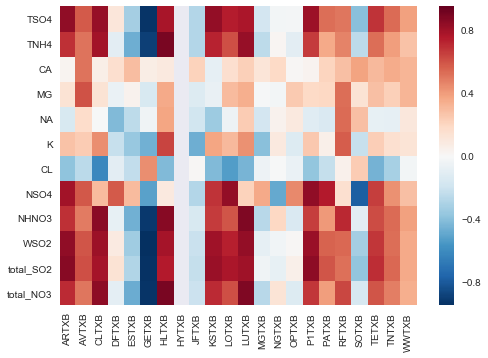

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


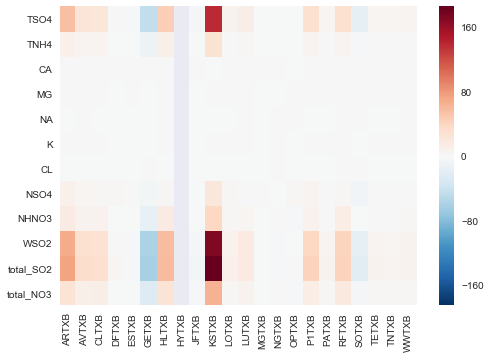

In [411]:
def makeMap(location):
    concentrationAK = groupData.loc[(location)]
    sedsTXB_1 = sedsTXB[sedsTXB.year >= 2000]

    sedsTXB_AK = sedsTXB_1[sedsTXB_1.state_code==location]
    dates = pd.Series([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], dtype='int')

    concentrationAK['year'] = dates.values
    concentrationAK_Final = concentrationAK[concentrationAK.year < 2018]

    msns = sedsTXB_AK.msn.unique()
    columns = concentrationAK_Final.columns
    columns = columns[:-1]
    concentrationAK_Final = concentrationAK_Final[columns]

    correlationMap = pd.DataFrame()

    for msn in msns:
        df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
        df.columns = ['year',msn]
        if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
            concentrationAK_Final[msn] = df[msn].values
            correlationMap[msn] = concentrationAK_Final[:-1].corrwith(concentrationAK_Final[msn])[:-1]
            concentrationAK_Final = concentrationAK_Final[columns]

    sns.heatmap(correlationMap)
    plt.show()


    columns = concentrationAK_Final.columns
    concentrationAK_Final = concentrationAK_Final[columns]

    covarianceMap = pd.DataFrame()

    #log
    for msn in msns:
        df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
        df.columns = ['year',msn]
        if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
            concentrationAK_Final[msn] = np.log(df[msn].values)
            covarianceMap[msn] = 100*concentrationAK_Final.cov()[msn][:-1]
            concentrationAK_Final = concentrationAK_Final[columns]

    sns.heatmap(covarianceMap)
    plt.show()


makeMap('AL')

PA


C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


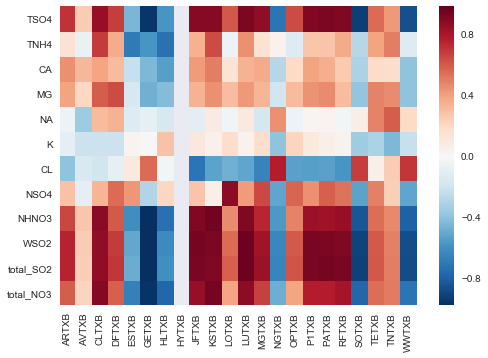

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


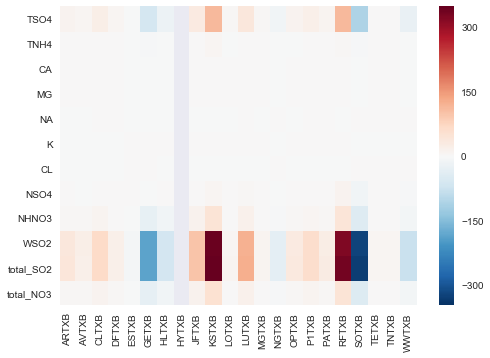

OH


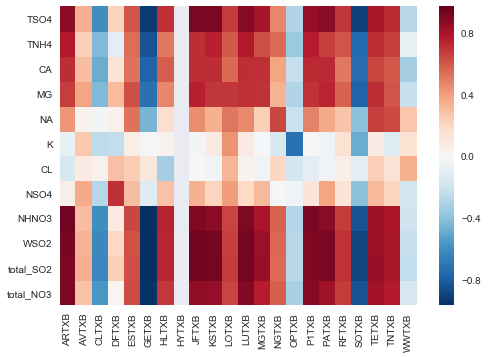

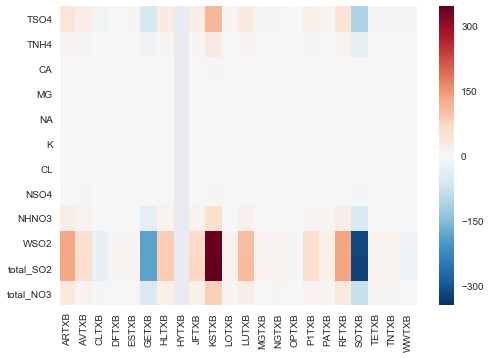

IL


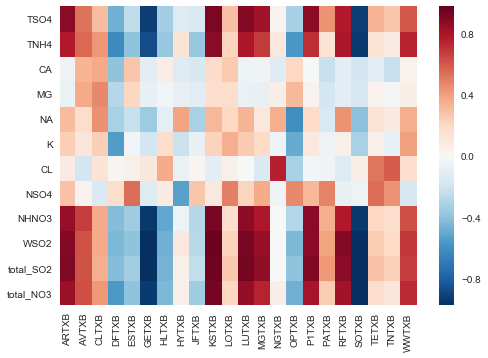

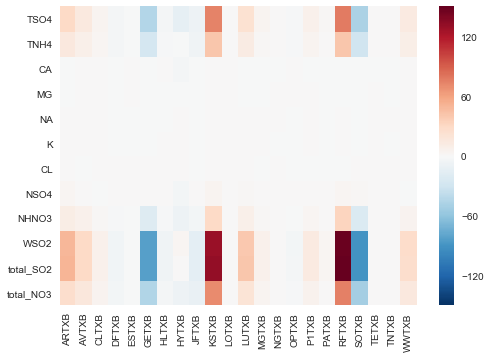

NC


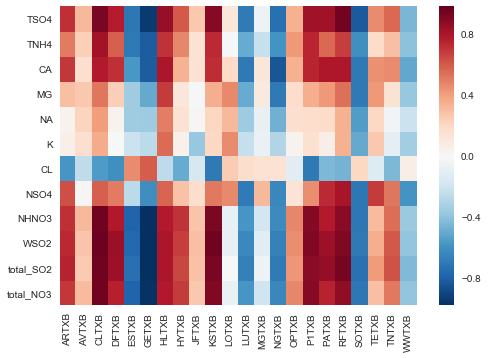

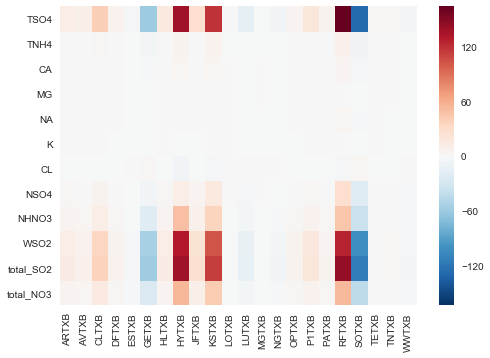

HI


ValueError: Length of values does not match length of index

In [412]:
for state in stateCodes:
    if(state != 'HI'):
        print(state)
        makeMap(state)

In [ ]:
def averageMap():
    aggregateCorrMap = pd.DataFrame().as_matrix()
    aggregateCovMap = pd.DataFrame().as_matrix()
    
    for location in stateCodes:
        if(location != "HI" and location != 'WA' and location != 'ON'  and location != 'VT'  and location != 'VI'):
            concentrationAK = groupData.loc[(location)]
            sedsTXB_1 = sedsTXB[sedsTXB.year >= 2000]

            sedsTXB_AK = sedsTXB_1[sedsTXB_1.state_code==location]
            dates = pd.Series([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], dtype='int')

            concentrationAK['year'] = dates.values
            concentrationAK_Final = concentrationAK[concentrationAK.year < 2018]

            msns = sedsTXB_AK.msn.unique()
            columns = concentrationAK_Final.columns
            columns = columns[:-1]
            concentrationAK_Final = concentrationAK_Final[columns]

            correlationMap = pd.DataFrame()


            for msn in msns:
                df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
                df.columns = ['year',msn]
                if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
                    concentrationAK_Final[msn] = df[msn].values
                    correlationMap[msn] = concentrationAK_Final[:-1].corrwith(concentrationAK_Final[msn])[:-1]
                    concentrationAK_Final = concentrationAK_Final[columns]




            columns = concentrationAK_Final.columns
            concentrationAK_Final = concentrationAK_Final[columns]

            covarianceMap = pd.DataFrame()

            #log
            for msn in msns:
                df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
                df.columns = ['year',msn]
                if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
                    concentrationAK_Final[msn] = np.log(df[msn].values)
                    covarianceMap[msn] = 100*concentrationAK_Final.cov()[msn][:-1]
                    concentrationAK_Final = concentrationAK_Final[columns]

            aggregateCorrMap = aggregateCorrMap - correlationMap.as_matrix() 
            aggregateCovMap = aggregateCovMap - covarianceMap.as_matrix()

    aggregateCorrMap = aggregateCorrMap/41
    aggregateCovMap = aggregateCovMap/41
    
    sns.heatmap(aggregateCorrMap)
    plt.show()
    sns.heatmap(aggregateCovMap)
    plt.show()
    
aggregateMap()

PA


C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


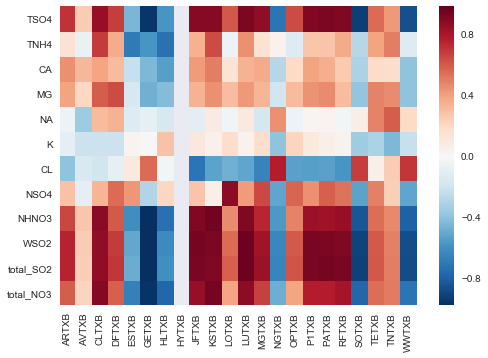

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


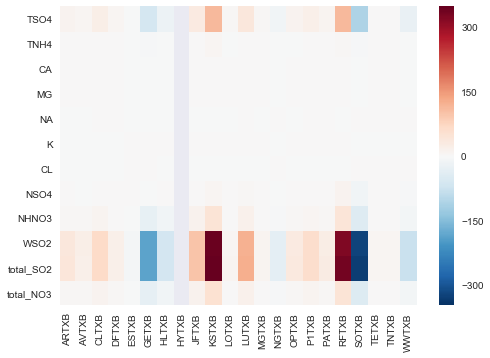

OH


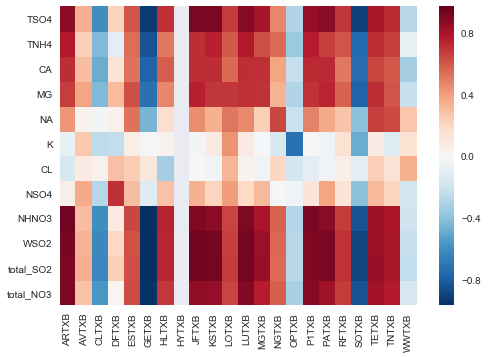

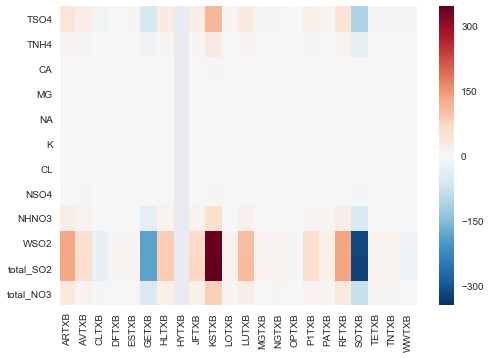

IL


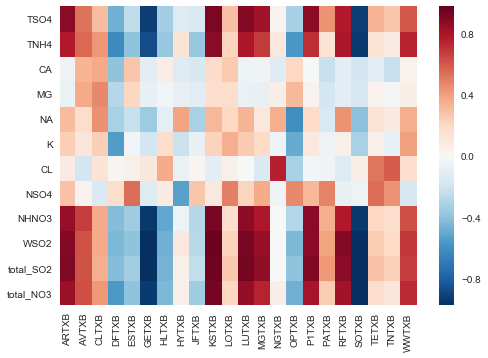

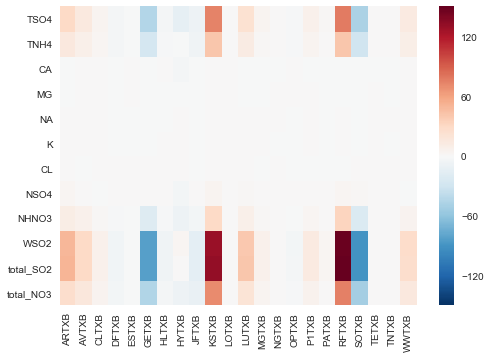

NC


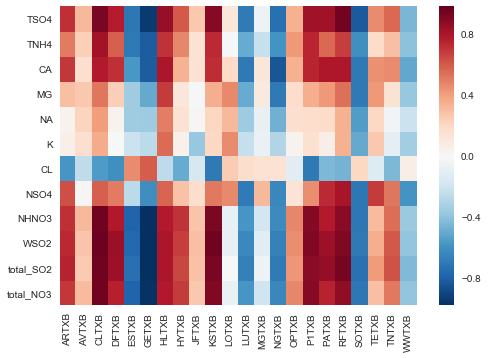

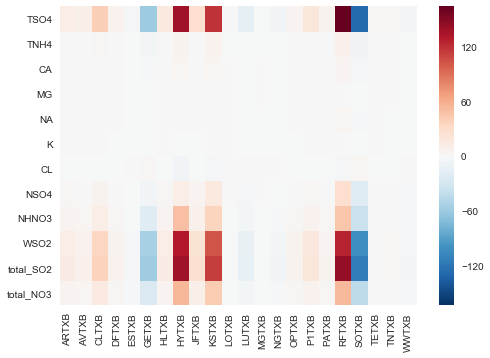

WI


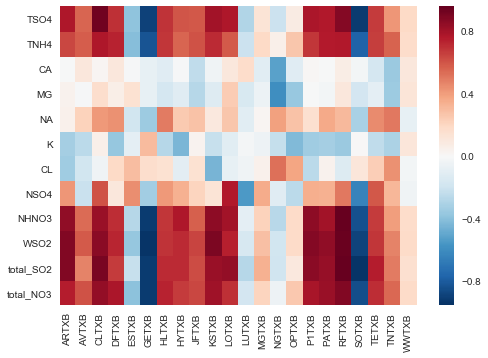

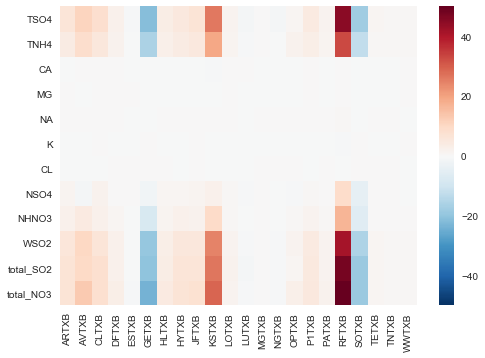

FL


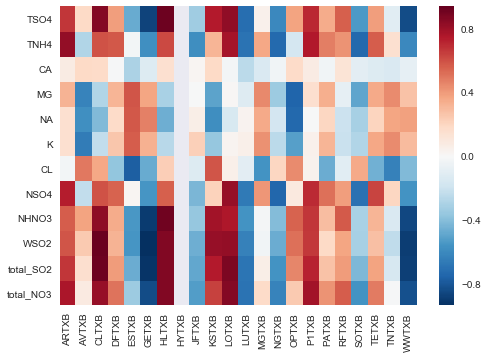

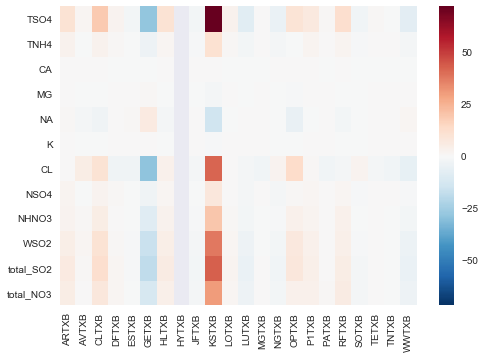

AR


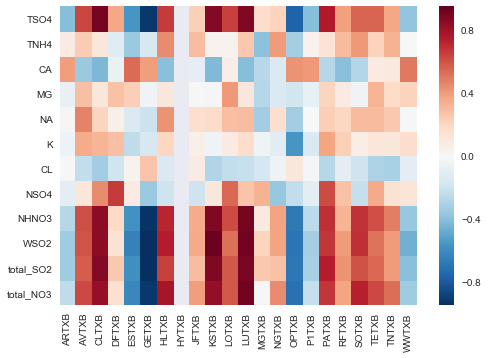

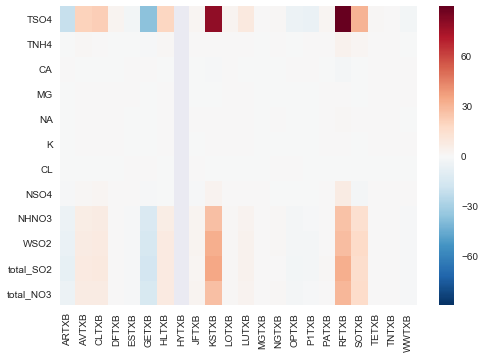

VA


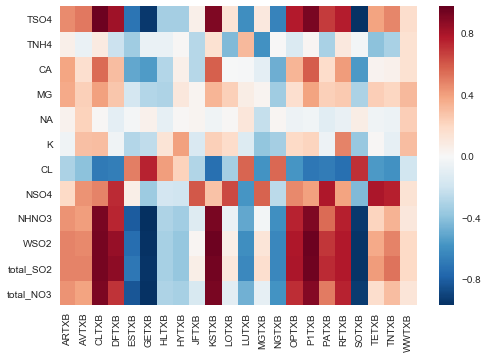

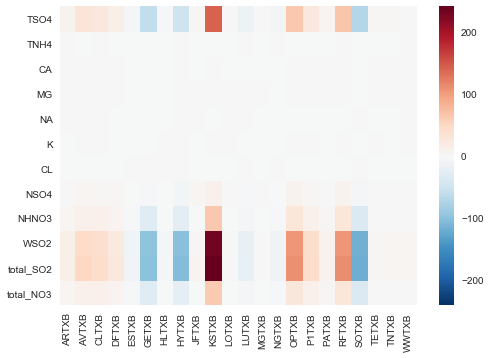

IN


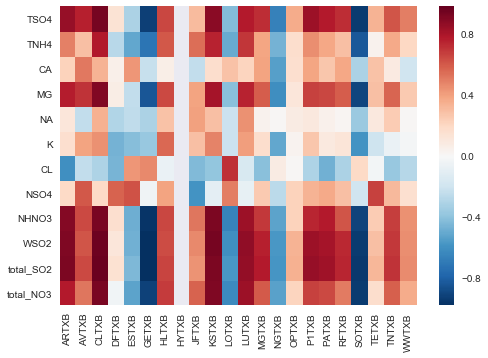

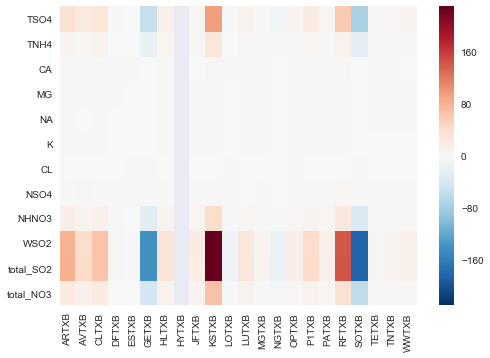

WV


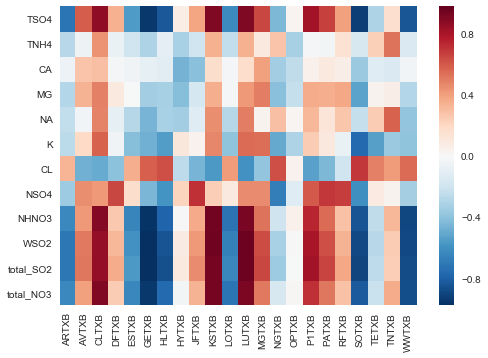

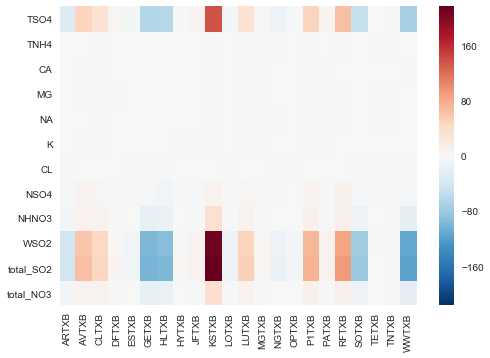

MD


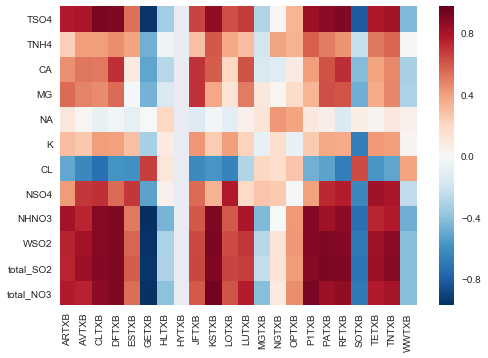

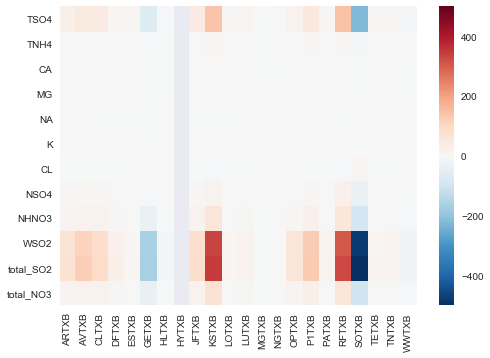

UT


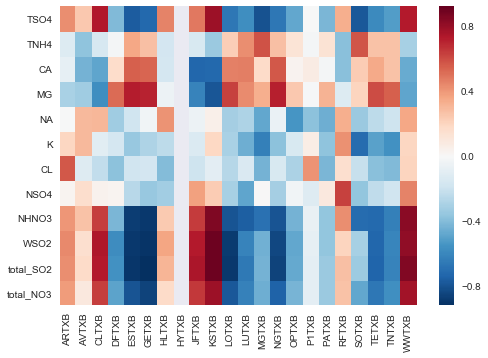

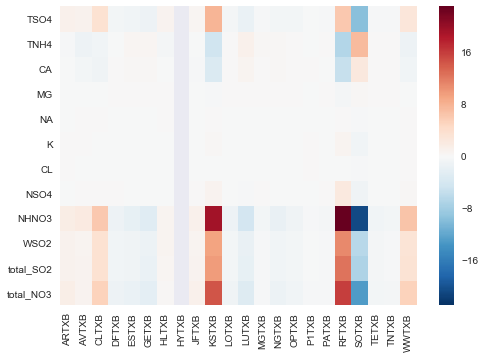

CO


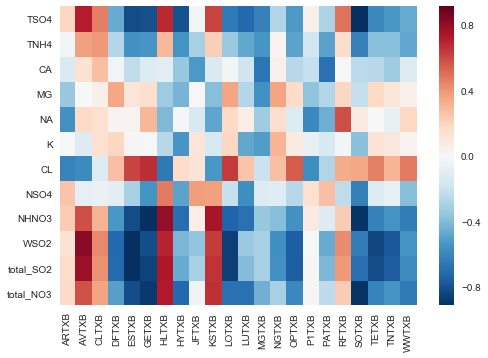

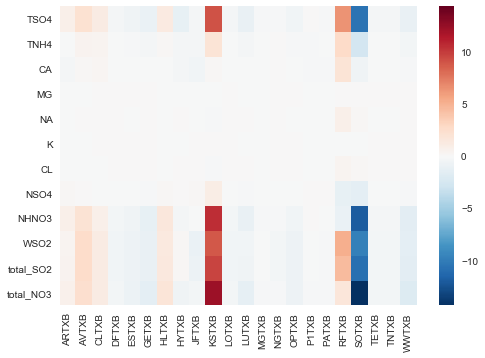

KY


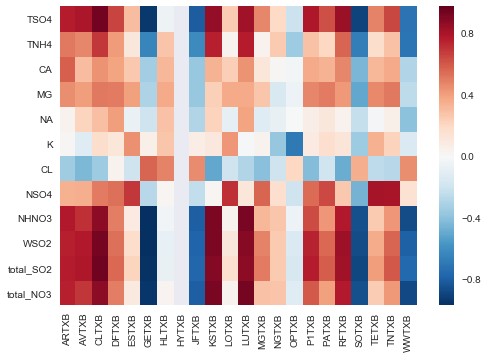

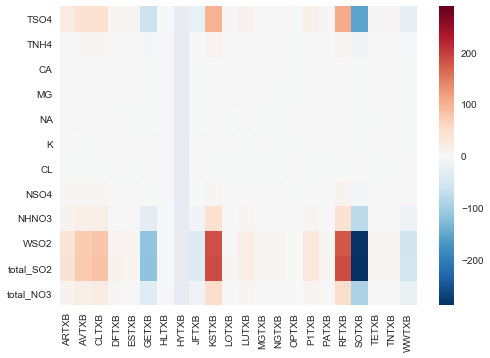

CT


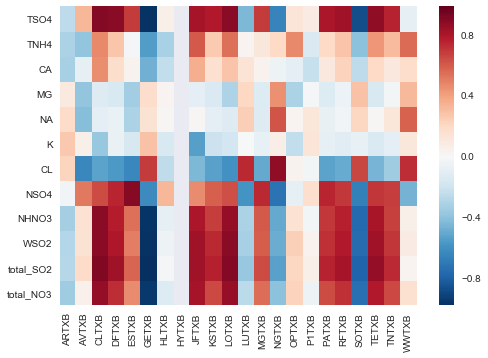

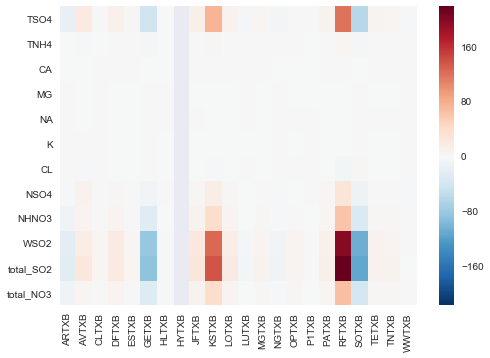

MI


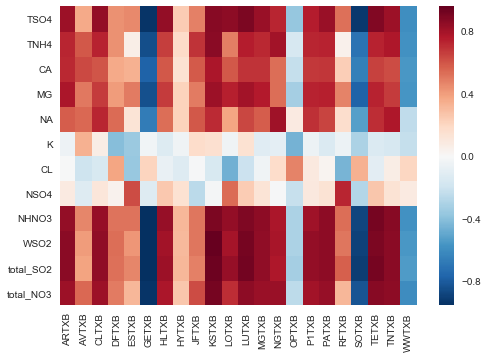

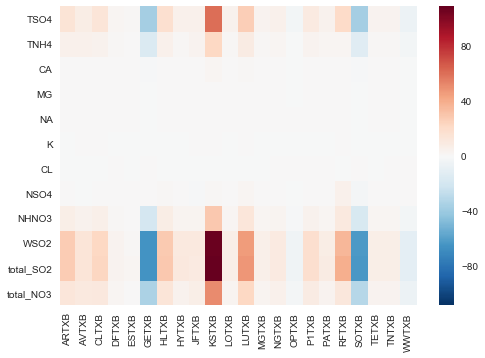

TN


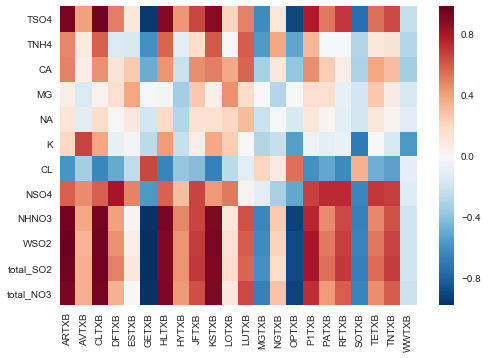

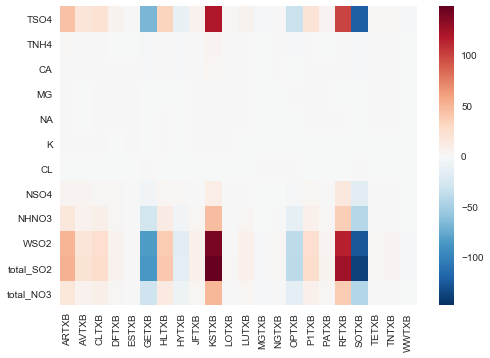

WY


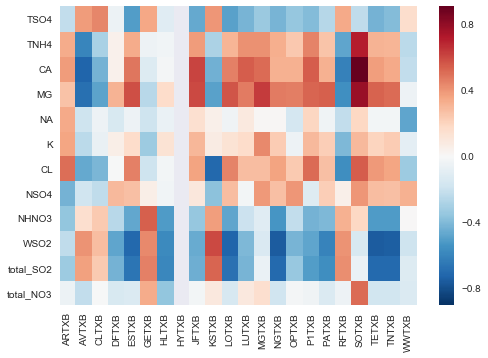

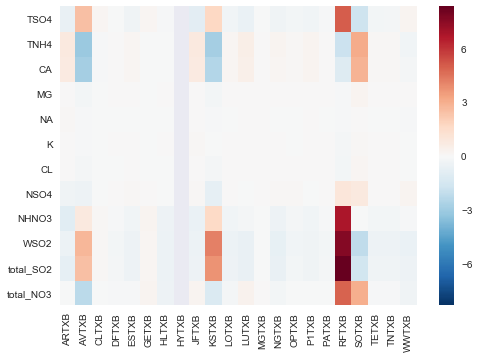

AZ


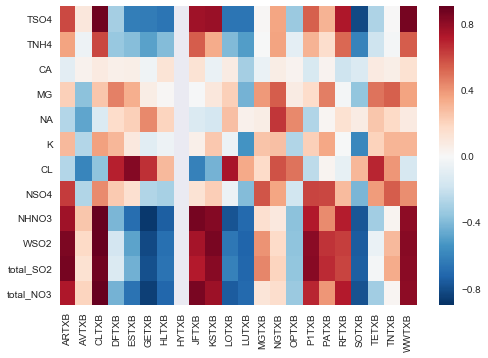

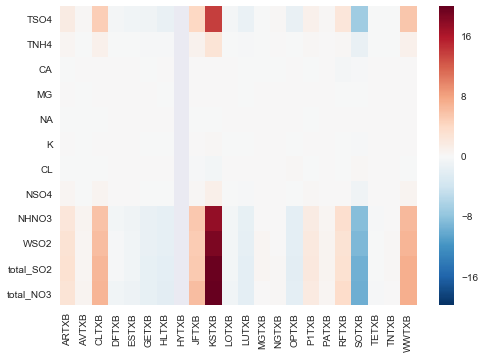

MT


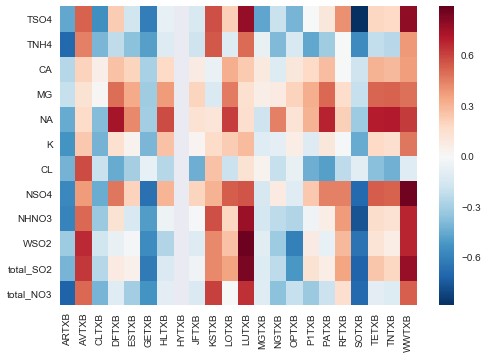

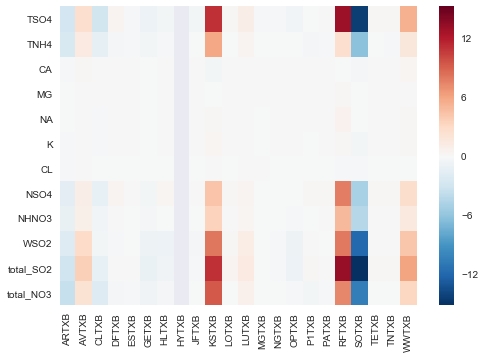

WA


ValueError: Length of values does not match length of index

In [414]:
for state in stateCodes:
    if(state != 'HI'):
        print(state)
        makeMap(state)

In [417]:
print(stateCodes[22:])

['ME' 'GA' 'MS' 'ON' 'NH' 'AK' 'NJ' 'CA' 'TX' 'AL' 'MN' 'NV' 'VT' 'VI' 'NY'
 'ND' 'KS' 'OK' 'SD' 'NE' 'ID']


Hello


C:\Python35\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


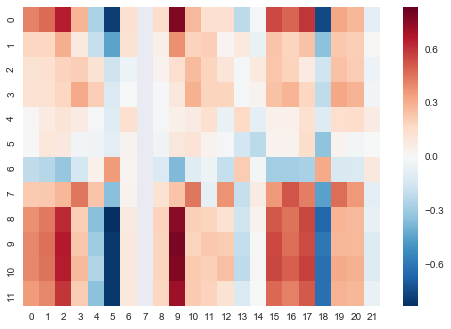

In [10]:
def averageCorrelationMap():
    aggregateCorrMap = np.zeros([12,22])
    
    for location in stateCodes:
        if(location != "HI" and location != 'WA' and location != 'ON'  and location != 'VT'  and location != 'VI' and location != 'KS' and location != 'OK' and location != 'SD' and location != 'NE' and location != 'ID'):
            concentrationAK = groupData.loc[(location)]
            sedsTXB_1 = sedsTXB[sedsTXB.year >= 2000]

            sedsTXB_AK = sedsTXB_1[sedsTXB_1.state_code==location]
            dates = pd.Series([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], dtype='int')

            concentrationAK['year'] = dates.values
            concentrationAK_Final = concentrationAK[concentrationAK.year < 2018]

            msns = sedsTXB_AK.msn.unique()
            columns = concentrationAK_Final.columns
            columns = columns[:-1]
            concentrationAK_Final = concentrationAK_Final[columns]

            correlationMap = pd.DataFrame()


            for msn in msns:
                df = pd.DataFrame(sedsTXB_AK[sedsTXB.msn == msn], columns=['year','value'])
                df.columns = ['year',msn]
                if(len(df) == 18 and msn != 'PCTXB' and msn != 'WYTXB'):
                    concentrationAK_Final[msn] = df[msn].values
                    correlationMap[msn] = concentrationAK_Final[:-1].corrwith(concentrationAK_Final[msn])[:-1]
                    concentrationAK_Final = concentrationAK_Final[columns]
        
            aggregateCorrMap = aggregateCorrMap + correlationMap.as_matrix()
            np.nan_to_num(aggregateCorrMap)
            concentrationAK_Final = concentrationAK_Final[columns]
            #print(aggregateCorrMapTest)
    
    aggregateCorrMap = aggregateCorrMap/33
    nationalCorrMap = pd.DataFrame(aggregateCorrMap, index=correlationMap.index, columns=correlationMap.columns)
    sns.heatmap(aggregateCorrMap)
    plt.show()
    
    return(nationalCorrMap)

print('Hello')
nationalCorrelation = averageCorrelationMap()

ME


C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


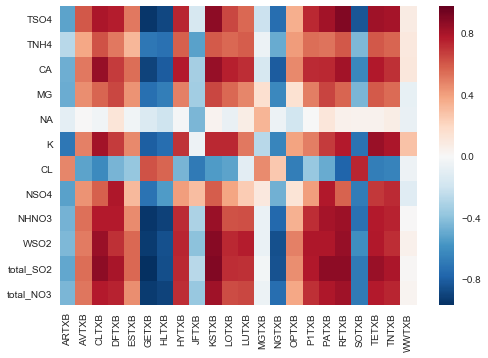

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


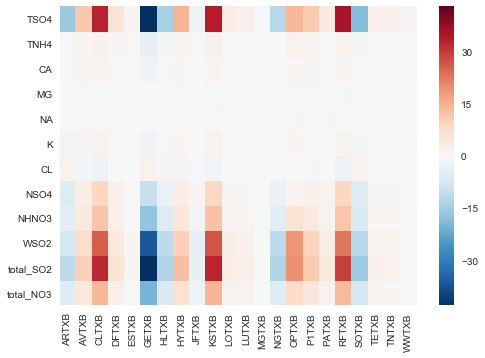

GA


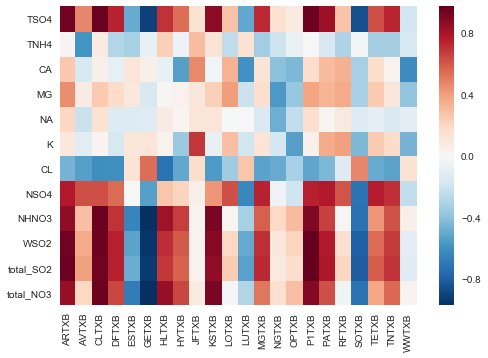

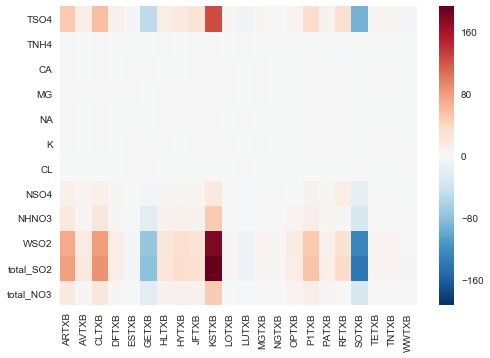

MS


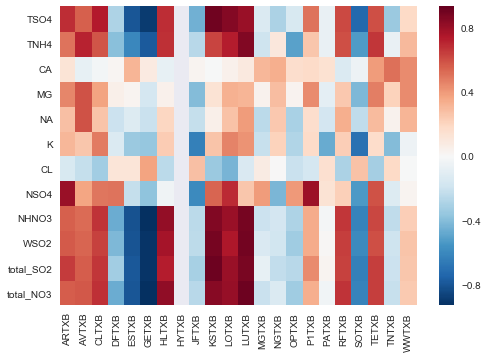

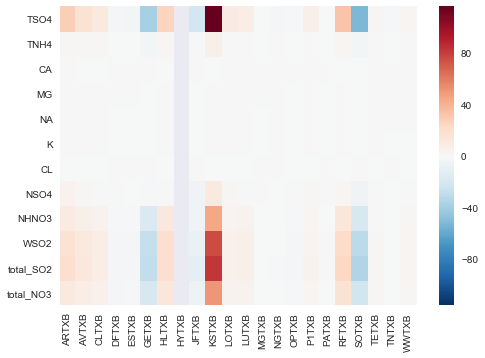

ON


ValueError: zero-size array to reduction operation minimum which has no identity

In [419]:
for state in stateCodes[22:]:
        print(state)
        makeMap(state)

NH


C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


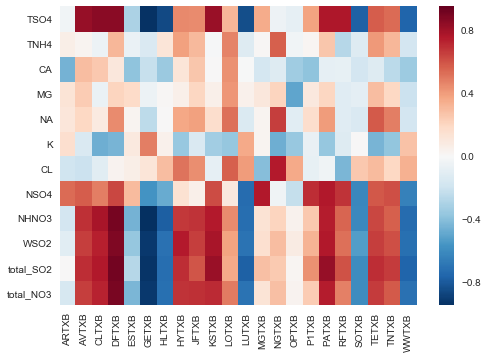

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


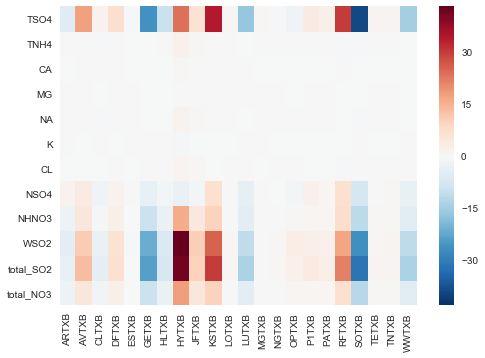

AK


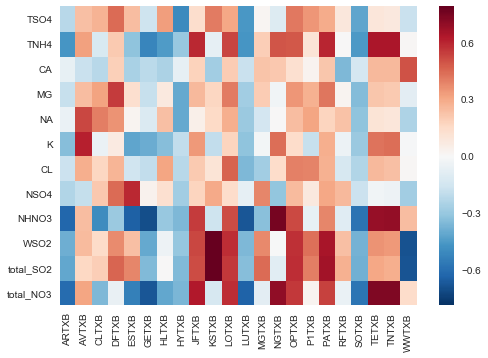

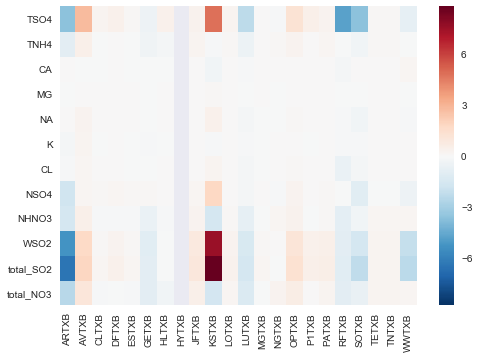

NJ


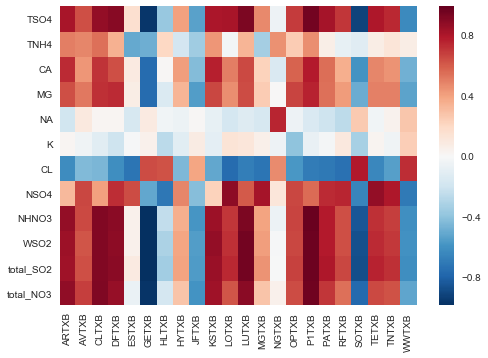

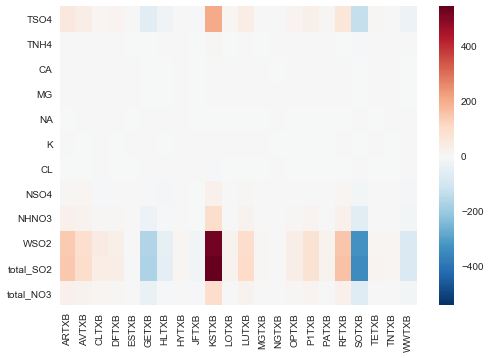

CA


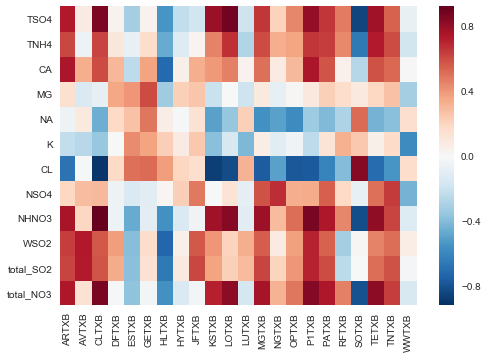

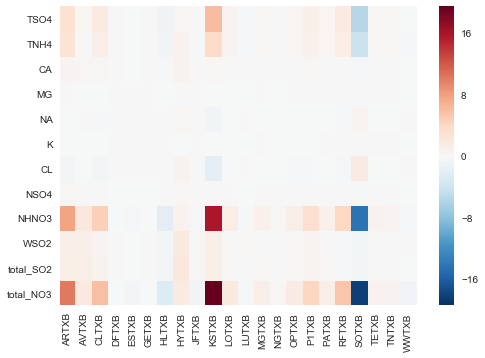

TX


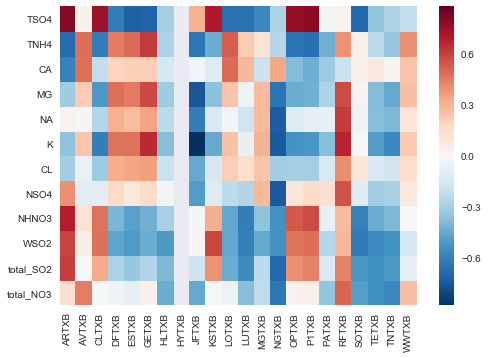

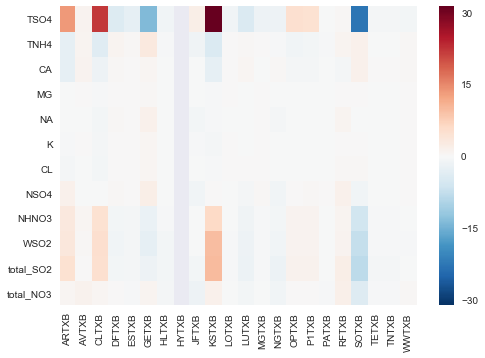

AL


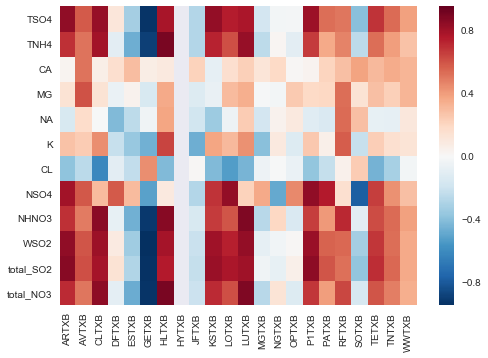

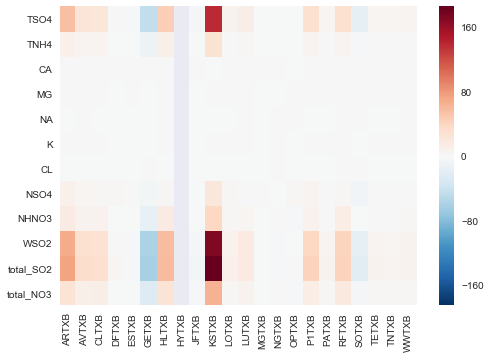

MN


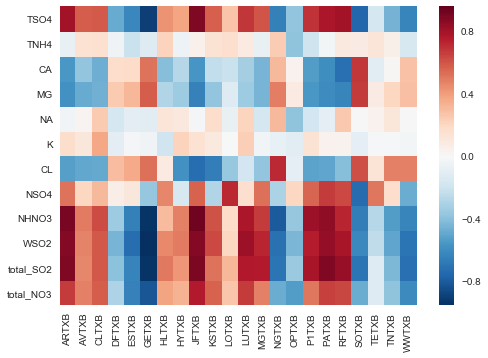

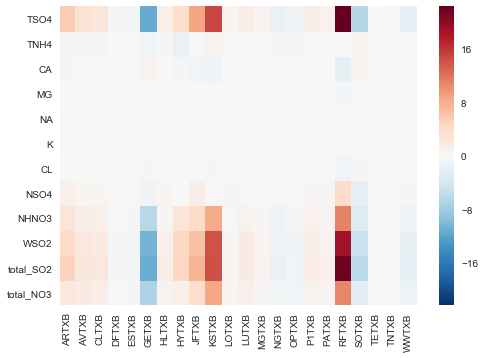

NV


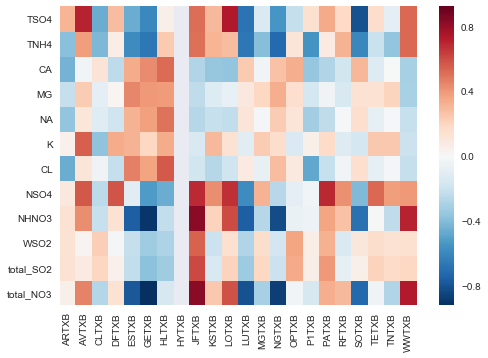

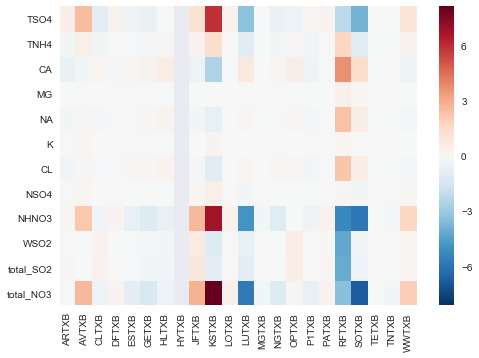

VT


ValueError: Length of values does not match length of index

In [420]:
for state in stateCodes[26:]:
        print(state)
        makeMap(state)

In [430]:
print(stateCodes)

['PA' 'OH' 'IL' 'NC' 'HI' 'WI' 'FL' 'AR' 'VA' 'IN' 'WV' 'MD' 'UT' 'CO' 'KY'
 'CT' 'MI' 'TN' 'WY' 'AZ' 'MT' 'WA' 'ME' 'GA' 'MS' 'ON' 'NH' 'AK' 'NJ' 'CA'
 'TX' 'AL' 'MN' 'NV' 'VT' 'VI' 'NY' 'ND' 'KS' 'OK' 'SD' 'NE' 'ID']


NY


C:\Python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


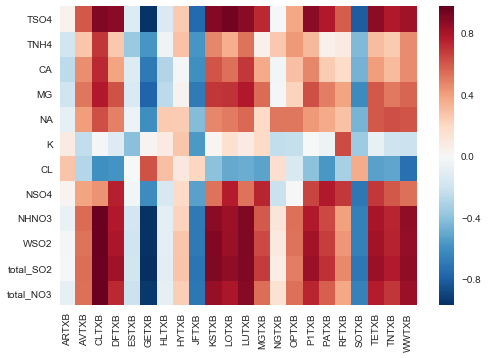

C:\Python35\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


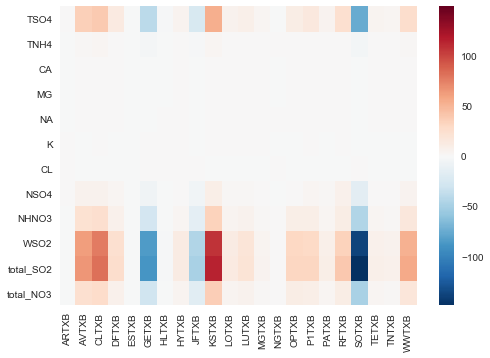

ND


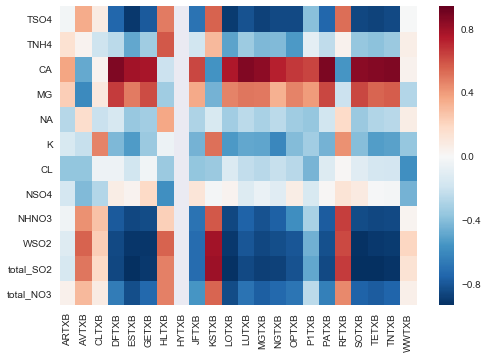

C:\Python35\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


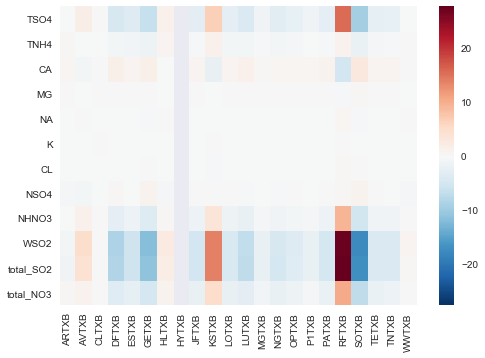

KS


ValueError: Length of values does not match length of index

In [423]:
for state in stateCodes[36:]:
        print(state)
        makeMap(state)

In [ ]:
print(stateCodes)

In [11]:
print(nationalCorrelation)

              ARTXB     AVTXB     CLTXB     DFTXB     ESTXB     GETXB  \
TSO4       0.410921  0.473480  0.651486  0.280151 -0.263481 -0.788269   
TNH4       0.182212  0.175779  0.303993  0.082088 -0.196571 -0.443528   
CA         0.121772  0.134017  0.194951  0.206901  0.122456 -0.172803   
MG         0.128735  0.128475  0.176357  0.313288  0.207707 -0.129448   
NA         0.009802  0.077428  0.116597  0.070111 -0.017259 -0.101728   
K          0.005338  0.099064  0.085529 -0.032499 -0.032630 -0.090142   
CL        -0.211359 -0.240695 -0.325051 -0.144134  0.042693  0.356380   
NSO4       0.218005  0.223402  0.275630  0.443094  0.235810 -0.350155   
NHNO3      0.382292  0.438335  0.622273  0.207540 -0.351381 -0.833298   
WSO2       0.406831  0.459214  0.659596  0.233012 -0.297630 -0.805801   
total_SO2  0.408646  0.452230  0.652159  0.271567 -0.252350 -0.801469   
total_NO3  0.355200  0.408041  0.592901  0.208832 -0.342818 -0.805165   

              HLTXB  HYTXB     JFTXB     KSTXB    

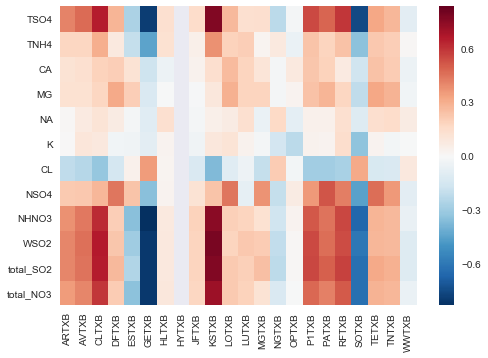

In [12]:
sns.heatmap(nationalCorrelation)
plt.show()


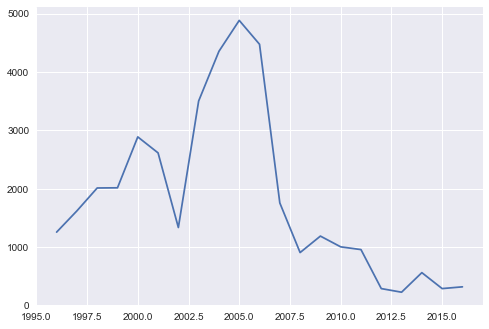

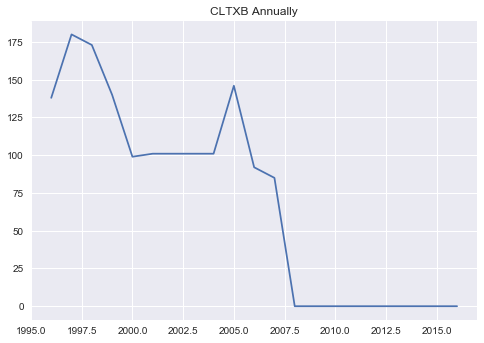

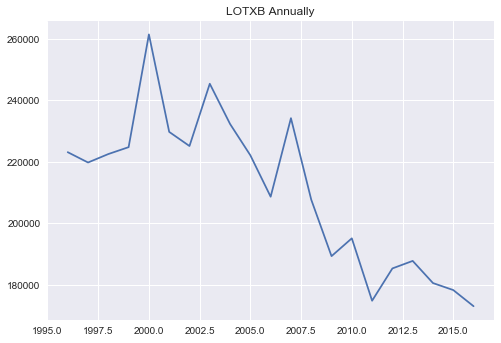

In [29]:
ktSed = sedsData[sedsData.msn == 'KSTXB']
ktSed = ktSed[ktSed.state_code == 'CT']
ktSed = ktSed[ktSed.year > 1995]

clSed = sedsData[sedsData.msn == 'CLTXB']
clSed = clSed[clSed.state_code == 'CT']
clSed = clSed[clSed.year > 1995]


loSed = sedsData[sedsData.msn == 'LOTXB']
loSed = loSed[loSed.state_code == 'CT']
loSed = loSed[loSed.year > 1995]

plt.plot(ktSed.year, ktSed.value)
plt.show()
plt.title("CLTXB Annually")
plt.plot(clSed.year, clSed.value)
plt.show()
plt.title("LOTXB Annually")
plt.plot(loSed.year, loSed.value)
plt.show()

